In [1]:
import pandas as pd
import pickle
from datasets import Dataset
from collections import Counter
from utils import id2label
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
df = pd.read_json('all.json')
history_dataset = df[df.genre=='history']
titles = history_dataset['title'].to_list()

In [3]:
# load
with open('models/logreg.pkl', 'rb') as f:
    model = pickle.load(f)
    
with open('models/tfidf_vectorizer.pkl', 'rb') as f:
    vect = pickle.load(f)

In [4]:
data = Dataset.from_pandas(history_dataset)
x_test = vect.transform(data['text'])
pred = model.predict_proba(x_test)

In [5]:
# id of paragraph where each chapter starts
titles_d = {}
for i in range(len(titles)):
    if titles[i] not in titles_d:
        titles_d[titles[i]] = i
        
titles_inv = {val:key for key, val in titles_d.items()}
titles_inv[3065] = 'A. TO THE REIGN OF JAMES I'

In [6]:
# on which paragraph and chapter each volume starts
volume_start = [('I', 0), ('XII', 708), ('XXIV', 1500), ('XXXVIII', 2245), ('XLV', 2797), ('LX', 4006), ('end', 5046)]

In [7]:
volume_names = ['Volume 1. The Early History of England, Part 1', 
                'Volume 2. The Early History of England, Part 2',
                'Volume 3. The History of the House of Tudor, Part 1', 
                'Volume 4. The History of the House of Tudor, Part 2', 
                'Volume 5. The History of Great Britain, Part 1', 
                'Volume 6. The History of Great Britain, Part 2']

In [8]:
def draw_volume(num):
    num = num-1
    fig, ax = plt.subplots(figsize=(15, 5), layout='constrained')
    
    start = volume_start[num][1] # starting paragraph
    end = volume_start[num+1][1] # ending paragraph + 1

    x = np.array([i for i in range(len(pred[start:end]))]) # go through paragraphs
    for i in range(7):
        y = pred.T[i][start:end]
        y = [v if v > 0.2 else None for v in y]
        ax.scatter(x,y, label=id2label[i])

    ax.legend()
    plt.title(volume_names[num])
    
    titles = [titles_inv[el] for el in titles_inv if el >= start and el < end]
    ticks = [el-start for el in titles_inv if el >= start and el < end]
    ax.xaxis.set_ticks(ticks, labels=titles, fontsize=10)
    
    for t in ticks:
        plt.axvline(x = t)
    
    plt.show()

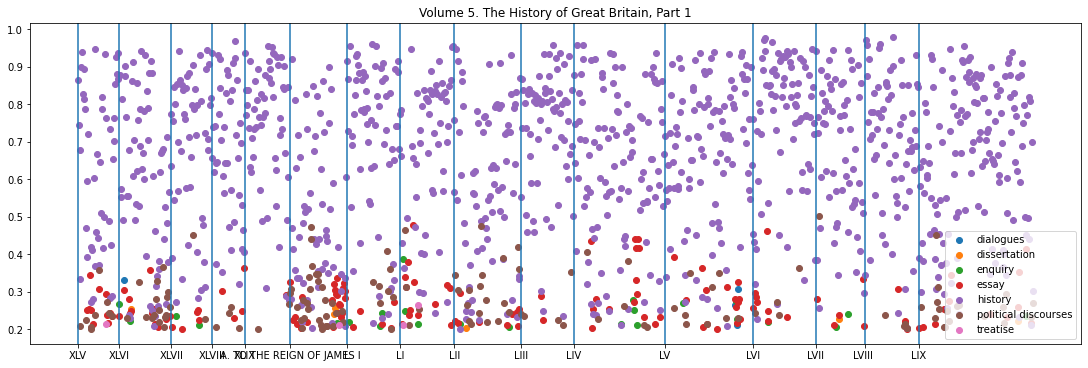

In [9]:
draw_volume(5)

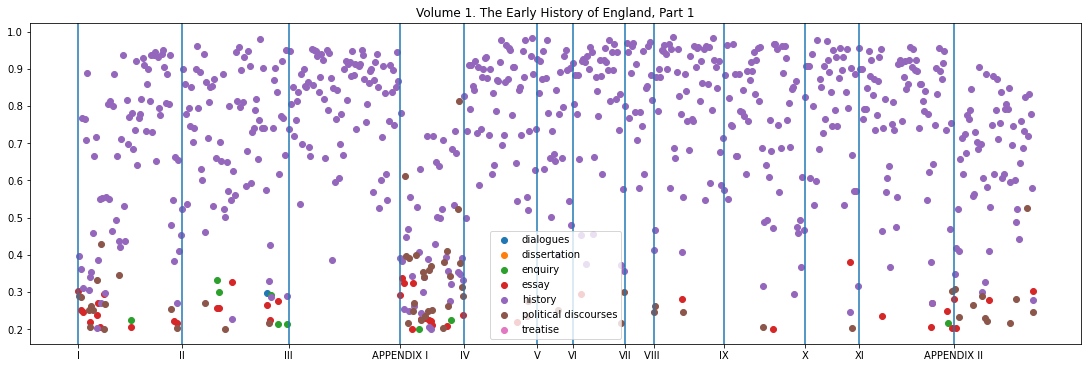

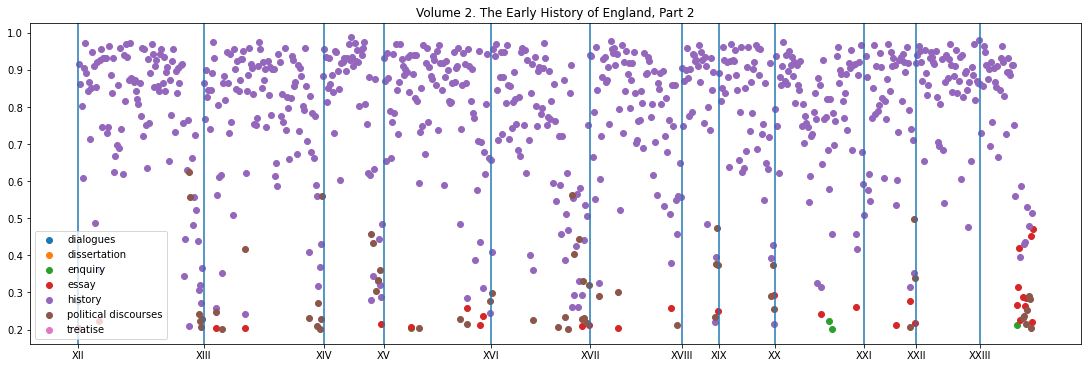

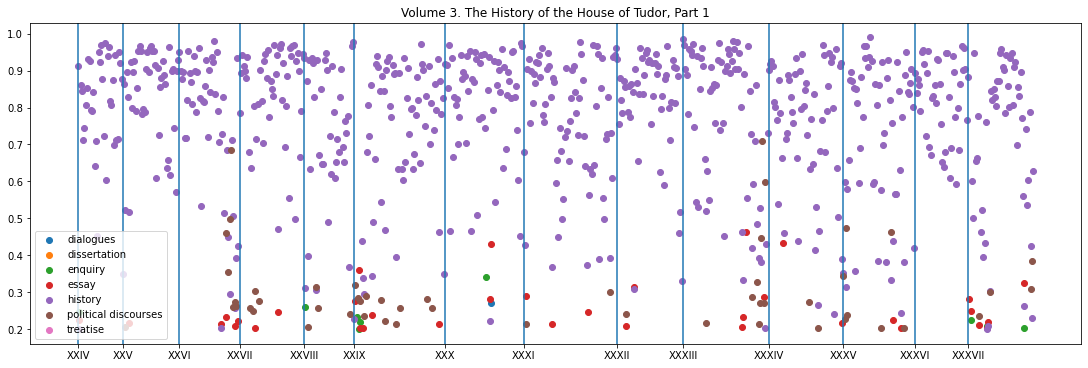

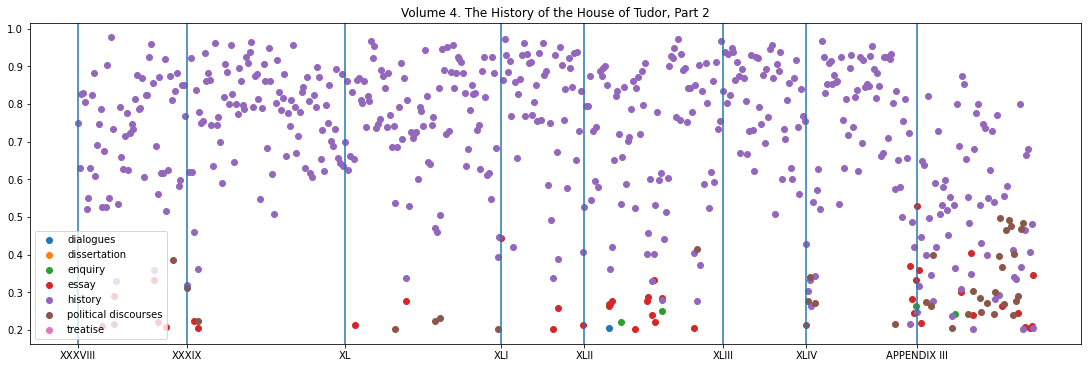

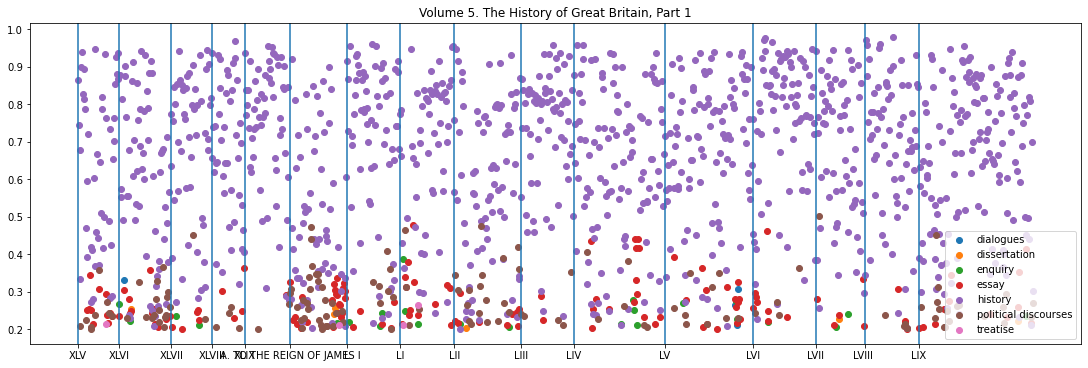

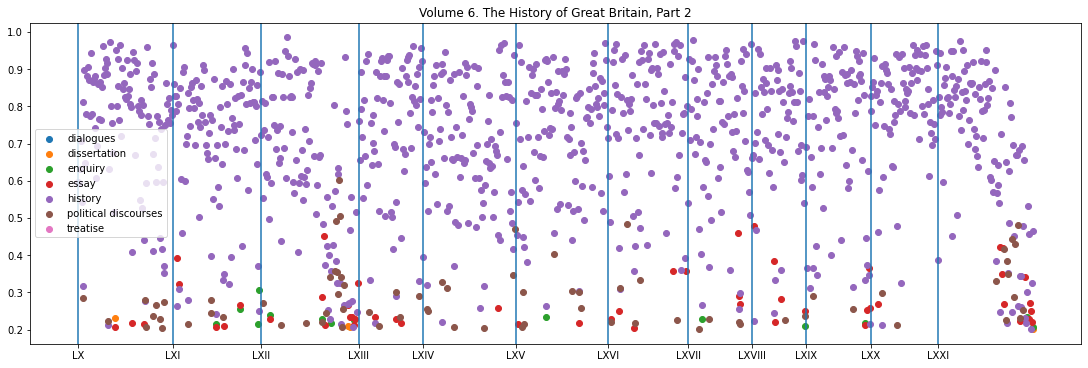

In [10]:
for i in range(1, 7):
    draw_volume(i)